# 2021 World Cheese awards analysis

---


blablalblacheeseblablablablafranceblablabla


## Libraries


In [1]:
import os

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

color_palette = ['peru', 'silver', 'khaki', 'gold']
sns.set_style("darkgrid")


## Download the datatset (Optional step)

You will normaly need to run this step once.  
I am using the `kaggle api` to get the dataset, but you can also directly download it from [here](https://www.kaggle.com/datasets/ericsims/world-cheese-awards-worlds-cheesiest-dataset?select=world_cheese_awards_2021.csv).

Regardless the option you choose, the dataset path should be **_(project_root)_/data/world_cheese_awards_2021.csv**.


### 1. Reading kaggle json credentials

You can go run directly 2. if you decided to put the _kaggle.json_ file under in _/home/[your_user]/.kaggle_


In [2]:
import json


In [3]:
with open('kaggle.json', 'r', encoding='utf-8') as kaggle_f:
    kaggle_creds = json.load(kaggle_f)

os.environ['KAGGLE_USERNAME'] = kaggle_creds['username']
os.environ['KAGGLE_KEY'] = kaggle_creds['key']


### 2. Download dataset with kaggle sdk


After setting kaggle env vars, the kaggle library should be imported without throwing errors


In [4]:
import kaggle

kaggle.api.authenticate()


In [5]:
kaggle.api.dataset_download_file(
    'ericsims/world-cheese-awards-worlds-cheesiest-dataset',
    'world_cheese_awards_2021.csv',
    path='data',
)


False

## Import dataset


In [6]:
df = pd.read_csv(
    'data/world_cheese_awards_2021.csv', sep=',', index_col=0
)  # first csv col is the index


In [7]:
df.shape


(1741, 6)

In [8]:
df.dtypes


company         object
product_name    object
rating          object
category        object
country         object
county          object
dtype: object

In [9]:
df.head(n=5)


,company,product_name,rating,category,country,county
0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,NaN
1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,NaN
2,Casale Roccolo azienda agricola biologica Website,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,NaN
3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View Stockists,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN
4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural View Stockists,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN


In [10]:
df.tail(n=5)


,company,product_name,rating,category,country,county
1736,Macroom Buffalo Cheese Products Website,Macroom Buffalo Ricotta 200g,SILVER,5709 - Ricotta made with buffalos' milk,Ireland,NaN
1737,Diaccialone Società Agricola Website,Ricotta di Bufala 250g,BRONZE,5709 - Ricotta made with buffalos' milk,Italy,NaN
1738,Macroom Buffalo Cheese Products Website,Macroom Buffalo Greek Style Cheese 180g,BRONZE,5710 - Any other buffalo's milk cheese not in any other class,Ireland,NaN
1739,CILENTO SPA Website,Lactose free Mozzarella di Bufala Campana PDO 180g,SILVER,5710 - Any other buffalo's milk cheese not in any other class,Italy,NaN
1740,Quattro Portoni s.r.l. – Società Agricola Website,QUADRELLO View Stockists,SILVER,5710 - Any other buffalo's milk cheese not in any other class,Italy,NaN


## Missing data

Not much missing data except in _county_ column.  
Let's keep in mind that county is applicable only when the country is UK.  
So nothing much to fear regarding missing values, the dataset looks pretty full.


In [11]:
per_missing = df.isna().sum() / df.shape[0]
per_missing[per_missing > 0].sort_values(ascending=False)


county    0.951177
dtype: float64

In [12]:
df.county.value_counts()


Somerset             19
Nottinghamshire       6
West Yorkshire        6
Leicestershire        6
Gloucestershire       5
Cornwall              5
Berkshire             4
North Yorkshire       4
Devon                 3
Greater London        3
Kent                  3
Hampshire             3
Wiltshire             2
Western Isles         2
Oxfordshire           2
Ceredigion            2
North Ayrshire        2
Powys                 1
Dublin                1
Fife                  1
Perth and Kinross     1
Dorset                1
Isle of Man           1
Lancashire            1
West Sussex           1
Name: county, dtype: int64

In [13]:
df.country[df.county.notna()].value_counts()


United Kingdom    85
Name: country, dtype: int64

## Data cleaning


### Companies's name
Removing the "Website" str suffix


In [14]:
df.company = df.company.apply(lambda x: x.rstrip(' Website'))
df.company.head(5)


0                        Laiteries H. Triballa
1               Fromageries Lescure (Savencia)
2    Casale Roccolo azienda agricola biologica
3                                    DeJong Ch
4                                    DeJong Ch
Name: company, dtype: object

## Feature engineering


### Separate category code and name


In [15]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    _df = df.copy()
    _df['cat_code'] = _df.category.apply(lambda x: x.split(' - ')[0])
    _df.cat_code = pd.to_numeric(_df.cat_code)
    _df.category = _df.category.apply(lambda x: x.split(' - ')[1])

    return _df


In [16]:
df = create_features(df)


In [17]:
df[['category', 'cat_code']]


,category,cat_code
0,Soft goats’ milk cheese plain – fresh,5001
1,Soft goats’ milk cheese plain – fresh,5001
2,Soft goats’ milk cheese plain – fresh,5001
3,Soft goats’ milk cheese plain – fresh,5001
4,Soft goats’ milk cheese plain – fresh,5001
...,...,...
1736,Ricotta made with buffalos' milk,5709
1737,Ricotta made with buffalos' milk,5709
1738,Any other buffalo's milk cheese not in any other class,5710
1739,Any other buffalo's milk cheese not in any other class,5710


## Cross-referencing data : countries data

Let's download a new dataset containing more informations about countries in general.  
This will unlock new analyzis possibilities, by adding more data like continents, region, country code, etc.


In [18]:
df_countries = pd.read_csv(
    'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv',
    sep=',',
)
df_countries.head()


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [19]:
df_countries.dtypes


name                         object
alpha-2                      object
alpha-3                      object
country-code                  int64
iso_3166-2                   object
region                       object
sub-region                   object
intermediate-region          object
region-code                 float64
sub-region-code             float64
intermediate-region-code    float64
dtype: object

### Data cleaning


Removing columns we won't need


In [20]:
df_countries = df_countries.drop(['alpha-2', 'iso_3166-2'], axis=1)


Clean columns name


In [21]:
df_countries.columns = [col.replace('-', '_').strip() for col in df_countries.columns]
df_countries = df_countries.rename(columns={'name': 'country'})

In [22]:
# Synchronize some country names with the cheese dataset
df_countries.loc[df_countries.alpha_3 == 'GBR', 'country'] = 'United Kingdom'
df_countries.loc[df_countries.alpha_3 == 'USA', 'country'] = 'USA'


### Missing values


In [23]:
per_countries_miss = df_countries.isna().sum()
per_countries_miss[per_countries_miss > 0].sort_values(ascending=False)


intermediate_region         142
intermediate_region_code    142
region                        1
sub_region                    1
region_code                   1
sub_region_code               1
dtype: int64

In [24]:
df_countries[
    (df_countries.region_code.isna())
    & (df_countries.sub_region_code.isna())
    & (df_countries.intermediate_region_code.isna())
]


,country,alpha_3,country_code,region,sub_region,intermediate_region,region_code,sub_region_code,intermediate_region_code
8,Antarctica,ATA,10,NaN,NaN,NaN,NaN,NaN,NaN


Some values in columns `intermediate-region` are missing.  
However after a closer look, it seems that when values are not missing, they correspond best to our idea of the `sub-region` column.

Let's replace `sub-region` values with `intermediate-region` ones when the later are not missing. We can then proceed to drop `intermediate-region`.
Don't forget to do the same operation for `sub-region-code` and `intermediate-region-code` ! Otherwise we will have a same code for two ditinct sub-regions !


In [25]:
miss_inter_reg = df_countries.intermediate_region.isna()
df_countries[~miss_inter_reg].head(10)


,country,alpha_3,country_code,region,sub_region,intermediate_region,region_code,sub_region_code,intermediate_region_code
6,Angola,AGO,24,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
7,Anguilla,AIA,660,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
9,Antigua and Barbuda,ATG,28,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
10,Argentina,ARG,32,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
12,Aruba,ABW,533,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
16,Bahamas,BHS,44,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
19,Barbados,BRB,52,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
22,Belize,BLZ,84,Americas,Latin America and the Caribbean,Central America,19.0,419.0,13.0
23,Benin,BEN,204,Africa,Sub-Saharan Africa,Western Africa,2.0,202.0,11.0
26,Bolivia (Plurinational State of),BOL,68,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0


In [26]:
# Checking for duplicate risk between sub-region code and intermediate-region code
df_countries[(df_countries.sub_region_code == df_countries.intermediate_region_code)]


,country,alpha_3,country_code,region,sub_region,intermediate_region,region_code,sub_region_code,intermediate_region_code


In [27]:
df_countries.loc[~miss_inter_reg, 'sub_region'] = df_countries[~miss_inter_reg].intermediate_region
df_countries.loc[~miss_inter_reg, 'sub_region_code'] = df_countries[ ~miss_inter_reg].intermediate_region_code
df_countries = df_countries.drop(['intermediate_region', 'intermediate_region_code'], axis=1)


Let's replace all left missing values in *_code* columns with -1

In [28]:
code_cols = [col for col in df_countries.columns if col.endswith('_code')]

In [29]:
df_countries[code_cols] = df_countries[code_cols].fillna(value=-1)

Set dtype to int for _code_ columns.

In [30]:
convert_dict = {col: int for col in code_cols}

df_countries = df_countries.astype(convert_dict)
df_countries.dtypes

country            object
alpha_3            object
country_code        int64
region             object
sub_region         object
region_code         int64
sub_region_code     int64
dtype: object

In [31]:
df_countries.head()

,country,alpha_3,country_code,region,sub_region,region_code,sub_region_code
0,Afghanistan,AFG,4,Asia,Southern Asia,142,34
1,Åland Islands,ALA,248,Europe,Northern Europe,150,154
2,Albania,ALB,8,Europe,Southern Europe,150,39
3,Algeria,DZA,12,Africa,Northern Africa,2,15
4,American Samoa,ASM,16,Oceania,Polynesia,9,61


### Merging with our cheese dataset
The number of rows should remain the same, we just add new columns.

In [32]:
df_merged = df.merge(df_countries, how='left', on='country')
df_merged.shape

(1741, 13)

In [33]:
df_merged.head()

,company,product_name,rating,category,country,county,cat_code,alpha_3,country_code,region,sub_region,region_code,sub_region_code
0,Laiteries H. Triballa,Picandou L'Original,GOLD,Soft goats’ milk cheese plain – fresh,France,NaN,5001,FRA,250,Europe,Western Europe,150,155
1,Fromageries Lescure (Savencia),ISLOS GREEK GOAT CHEESE 150G,BRONZE,Soft goats’ milk cheese plain – fresh,Greece,NaN,5001,GRC,300,Europe,Southern Europe,150,39
2,Casale Roccolo azienda agricola biologica,Caprino Fresco CASALE ROCCOLO,SILVER,Soft goats’ milk cheese plain – fresh,Italy,NaN,5001,ITA,380,Europe,Southern Europe,150,39
3,DeJong Ch,Alphenaer Crumbled Goats Cheese Natural View Stockists,BRONZE,Soft goats’ milk cheese plain – fresh,Netherlands,NaN,5001,NLD,528,Europe,Western Europe,150,155
4,DeJong Ch,Alphenaer Spreadable Goats Cheese Natural View Stockists,BRONZE,Soft goats’ milk cheese plain – fresh,Netherlands,NaN,5001,NLD,528,Europe,Western Europe,150,155


In [34]:
df_merged.to_csv('data/world_cheese_awards_2021_augmented.csv', sep=',', index=False)

## Target analysis


In [35]:
target = 'rating'
features = [col for col in df_merged.columns if col != target]
target, features


('rating',
 ['company',
  'product_name',
  'category',
  'country',
  'county',
  'cat_code',
  'alpha_3',
  'country_code',
  'region',
  'sub_region',
  'region_code',
  'sub_region_code'])

We have imbalanced classes. *Who could have guessed ?*

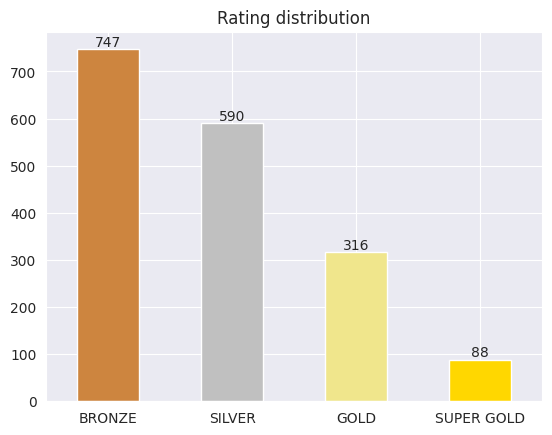

In [36]:
ax = df_merged[target].value_counts().plot.bar(rot=0, color=color_palette)
ax.bar_label(ax.containers[0])
plt.title('Rating distribution')
plt.show()


## Top countries


In [37]:
df_rt = df_merged[['country', 'rating']]
ratings = ['SUPER GOLD', 'GOLD', 'SILVER', 'BRONZE']
n = 15


Look at this beautiful cross table !  
It shows Spain having the most prizes in every rating.  
"Hey, that's not fair ! Spain had _way_ more cheeses in the competition !"


In [38]:
top_n = pd.crosstab(df_rt.country, df_rt.rating)

top_n = top_n.loc[:, ratings]  # re-ordering columns
top_n['Total_ratings'] = top_n.sum(axis=1, numeric_only=True)
top_n = top_n.sort_values(by='SUPER GOLD', ascending=False).head(15)

top_n


rating,SUPER GOLD,GOLD,SILVER,BRONZE,Total_ratings
country,,,,,
Spain,27,118,246,332,723
Italy,15,70,116,119,320
United Kingdom,8,14,23,40,85
Netherlands,8,15,22,35,80
France,7,21,35,25,88
Belgium,5,4,6,14,29
Austria,4,13,21,34,72
Switzerland,3,20,34,29,86
Portugal,2,4,6,11,23


In [39]:
def stacked_rewards_distrib(
    df: pd.DataFrame,
    sort_value: str,
    title: str,
    colors: list[str] = color_palette,
    bar_type: str = 'barh',
    n_top: int = 15,
) -> None:
    """Plot the distribution of each rewards in a stacked bar chart."""
    ax = (
        df.loc[:, ratings[::-1]]  # reverse list for diplay purposes
        .head(n_top)
        .sort_values(by=sort_value)
        .plot(kind=bar_type, color=colors, stacked=True)
    )
    ax.set(ylabel=None)
    plt.title(title)
    plt.legend(title='Rewards', bbox_to_anchor=(1.0, 1.0))
    plt.show()


In [40]:
def rewards_distrib(
    df: pd.DataFrame,
    figsize: tuple[int, int] = (10, 5),
    bar_type: str = 'bar',
    bar_labels: bool = False,
    colors: list[str] = color_palette,
    padding_top: float = 1.6,
):
    """Plot the distribution of each rewards in separate subplots."""
    fig, ax = plt.subplots(len(ratings), 1, figsize=figsize, sharex=True)

    for i, rt in enumerate(ratings):
        df.loc[:, rt].plot(kind=bar_type, ax=ax[i], title=rt, color=colors[i])
        ax[i].tick_params('x', labelrotation=45)
        ax[i].set(xlabel=None)

        if bar_labels:
            for container in ax[i].containers:
                ax[i].bar_label(container)

    plt.subplots_adjust(top=padding_top)
    plt.show()


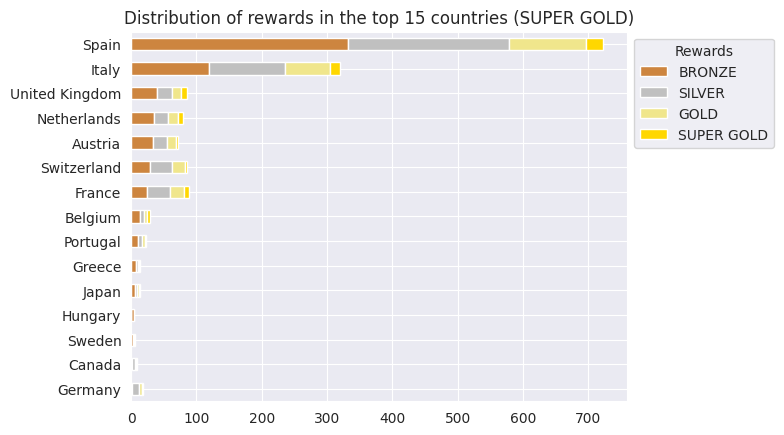

In [41]:
stacked_rewards_distrib(
    top_n,
    n_top=n,
    sort_value='BRONZE',
    title='Distribution of rewards in the top 15 countries (SUPER GOLD)',
)


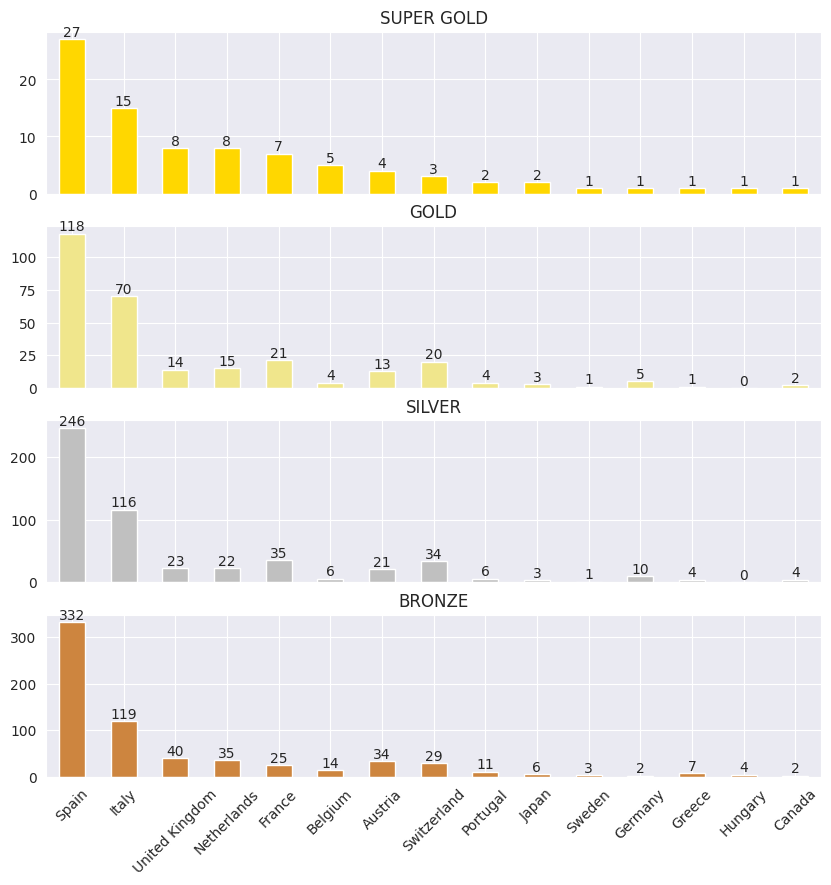

In [42]:
rewards_distrib(top_n, bar_labels=True, colors=color_palette[::-1])


Another type of ranking could be to compute the share of each prize in the total number of obtained prizes for the country. This time, Japan rules !  
The cross table gives us interesting insights of the competition !  
"Hey that's not fair ! Japan has only 2 cheeses in the competition ! Isn't this ranking giving an _outrageous_ advantage to countries with fewer cheeses ?"


In [43]:
per_top_n = top_n.copy()
per_top_n.iloc[:, :-1] = (top_n.divide(top_n.Total_ratings, axis=0) * 100).round(2)
per_top_n = per_top_n.sort_values(by='SUPER GOLD', ascending=False)
per_top_n


rating,SUPER GOLD,GOLD,SILVER,BRONZE,Total_ratings
country,,,,,
Hungary,20.00,0.00,0.00,80.00,5
Belgium,17.24,13.79,20.69,48.28,29
Sweden,16.67,16.67,16.67,50.00,6
Japan,14.29,21.43,21.43,42.86,14
Canada,11.11,22.22,44.44,22.22,9
Netherlands,10.00,18.75,27.50,43.75,80
United Kingdom,9.41,16.47,27.06,47.06,85
Portugal,8.70,17.39,26.09,47.83,23
France,7.95,23.86,39.77,28.41,88


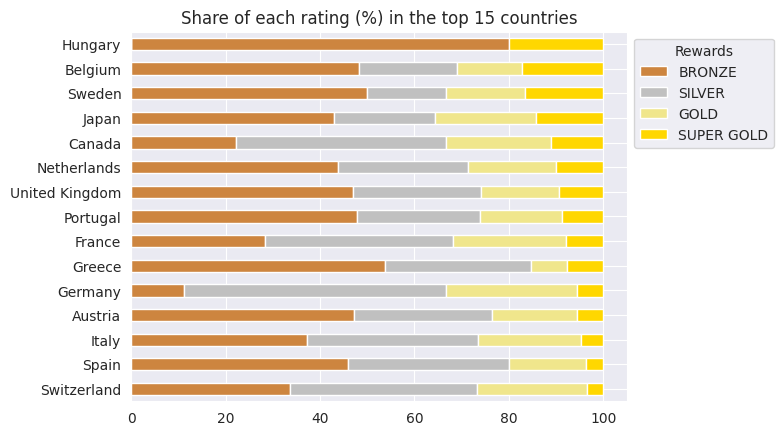

In [44]:
stacked_rewards_distrib(
    per_top_n,
    sort_value='SUPER GOLD',
    title=f'Share of each rating (%) in the top {n} countries',
)

_sight_ We would argue that Ireland or Germany are not doing so great despite having less cheese.  
But I agree on one point : just like the Olympics Games, we only based our ranking on the total number of obtained "SUPER GOLD".

Few ideas :

1. Do like schools (mostly western europe) to compute a final 'end of the semester' mark.  
   It consist in computing the mean of all obtained ratings and ponderating each rating type in the computation  
   Giving us : $$mark = {nSUPERGOLD*x + ... + nBRONZE*k \over 4} $$

2. A scoring system, where we attribute a number of points for each type of rating and compute the total points.  
   This is nothing new, several ranking systems already exist for this kind of competition.
   See [here](https://www.topendsports.com/events/summer/medal-tally/rankings.htm#:~:text=The%20common%20method%20of%20determining,still%20no%20'official'%20method.) for more details.

I'll go with the **Fibonacci weighted point system (4:3:2:1)**, you are free to choose one you like.


In [45]:
pts_dict = {'SUPER GOLD': 4, 'GOLD': 3, 'SILVER': 2, 'BRONZE': 1}


In [46]:
top_n_points = top_n.copy()

top_n_points['Score'] = (
    top_n_points['SUPER GOLD'] * pts_dict['SUPER GOLD']
    + top_n_points['GOLD'] * pts_dict['GOLD']
    + top_n_points['SILVER'] * pts_dict['SILVER']
    + top_n_points['BRONZE'] * pts_dict['BRONZE']
)


This is still giving a serious advantage to coutries with more cheese in the competition...  
It just shows us that establishing a fair ranking system is hard with high data imbalance.


In [47]:
top_n_points.sort_values(by='Score', ascending=False)


rating,SUPER GOLD,GOLD,SILVER,BRONZE,Total_ratings,Score
country,,,,,,
Spain,27,118,246,332,723,1286
Italy,15,70,116,119,320,621
France,7,21,35,25,88,186
Switzerland,3,20,34,29,86,169
United Kingdom,8,14,23,40,85,160
Netherlands,8,15,22,35,80,156
Austria,4,13,21,34,72,131
Belgium,5,4,6,14,29,58
Portugal,2,4,6,11,23,43


Wait hold on, did we just questionned the entire ranking system of the Olympics Games ?

## Top regions


## Top companies
